In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

In [72]:
DATA_PATH="./data/10/"
labels=os.listdir(DATA_PATH)

In [73]:
def speech2mfcc(file_path,max_len=11):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    wave=wave[::5]
    mfcc=librosa.feature.mfcc(wave,sr=sr)
#    print(mfcc)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

    else:
        mfcc=mfcc[:,:max_len]
#    print(mfcc.shape)
    return mfcc

In [74]:
mfcc_vectors=[]

for speech in labels:
    mfcc=speech2mfcc(DATA_PATH+speech)
    mfcc_vectors.append(mfcc)

In [75]:
mfcc_total=[]
for n_mf,_ in enumerate(mfcc_vectors[1]):
#    print('n_mf='+repr(n_mf))
    mfcc_i=mfcc_vectors[0][n_mf,]
    for i,_ in enumerate(mfcc_vectors[1:]):
#        print('i='+repr(i))
        mfcc_i=np.vstack((mfcc_i,mfcc_vectors[i+1][n_mf,]))
    mfcc_total.append(mfcc_i)

In [76]:
for j,_ in enumerate(mfcc_total):
    mfcc_total[j][mfcc_total[j] ==0]=np.nan

In [77]:
std_total=np.nanstd(mfcc_total,axis=1)

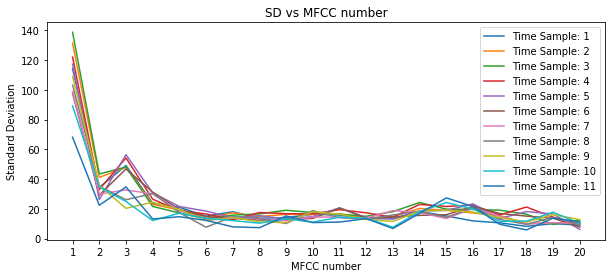

In [78]:
plt.figure(figsize=(10,4))
plt.plot(range(1,21),std_total)
plt.xlabel('MFCC number')
plt.ylabel('Standard Deviation')
plt.xticks(range(1,21))
plt.title('SD vs MFCC number')

label=[]
for i,_ in enumerate(std_total.transpose()):
    label.append('Time Sample: '+repr(i+1))

plt.legend(label,loc=1)
plt.savefig('SD_vs_MFCC_10.svg',format='svg', dpi=1200)